# Overview
The goal of this evaluation is to aid the company in making informed decisions on the suitable aircraft model to procure as it ventures into both commercial and private aviation enterprises.  

# Business Understanding
The company is interested in diversifying its business venture through investing in the aviation sector, both commercial and private enterprises. The company’s interests are detracted by limited expertise and knowledge on risks in the field of aviation. This has hindered expansion and diversification process compelling a low-risk analysis on different aircraft model to be conducted.


# Data Understanding
The Data-driven analysis of the risks involved in venturing into the aviation industry is essential to ensure profitability and optimal returns to the company.

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters

Acknowledgement : Data is sourced from kaggle Aviation Accident Database & Synopses, up to 2023

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
AviationData=pd.read_csv('/content/AviationData.csv',encoding='latin1')

<ipython-input-40-a81e661f08e8>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  AviationData=pd.read_csv('/content/AviationData.csv',encoding='latin1')


In [ ]:
AviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
USState_Codes=pd.read_csv('/content/USState_Codes.csv')

In [ ]:
USState_Codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
AviationData['Country'].value_counts()

,count
Country,
United States,82248
Brazil,374
Canada,359
Mexico,358
United Kingdom,344
...,...
Seychelles,1
Palau,1
Libya,1


In [ ]:
AviationData.shape

(88889, 31)

In [ ]:
AviationData.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data Preparation

# Data Cleaning

In [ ]:
AviationData['State_Abbreviation'] = AviationData['Location'].str[-2:]

AviationData = AviationData.merge(USState_Codes, left_on='State_Abbreviation', right_on='Abbreviation', how='left')

In [ ]:
AviationDataUS = AviationData[AviationData['Country'] == 'United States']
AviationDataUS.reset_index(drop=True, inplace=True)

In [ ]:
AviationDataUS.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State_Abbreviation,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California,CA


In [ ]:
AviationDataUS['Event.Date'] = pd.to_datetime(AviationDataUS['Event.Date'])

<ipython-input-51-d7b7ccf4ca47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AviationDataUS['Event.Date'] = pd.to_datetime(AviationDataUS['Event.Date'])


In [ ]:
AviationDataUS['Year'] = AviationDataUS['Event.Date'].dt.year

<ipython-input-52-c3a07ff26cb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AviationDataUS['Year'] = AviationDataUS['Event.Date'].dt.year


In [ ]:
AviationDataUS.shape

(82248, 35)

In [ ]:
AviationDataUS['Country'].value_counts()

,count
Country,
United States,82248


In [ ]:
AviationDataUS.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,82248,80373.000000,71594.000000,70873.000000,71519.000000,77243.000000,82248.000000
mean,1998-11-29 21:38:16.352494976,1.135481,0.421683,0.257178,0.332974,4.302448,1998.407633
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1988-07-12 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1997-06-19 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000
75%,2008-04-07 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2008.000000
max,2022-12-29 00:00:00,8.000000,265.000000,137.000000,125.000000,699.000000,2022.000000
std,NaN,0.427286,2.433647,1.144189,1.306604,23.794728,11.670207


In [ ]:
AviationDataUS['Investigation.Type'].value_counts()

,count
Investigation.Type,
Accident,79906
Incident,2342


In [ ]:
AviationDataUS['Aircraft.Category'].value_counts()

,count
Aircraft.Category,
Airplane,24229
Helicopter,2723
Glider,503
Balloon,229
Gyrocraft,172
Weight-Shift,161
Powered Parachute,90
Ultralight,25
WSFT,9


In [ ]:
AviationDataUS['Report.Status'].value_counts()

,count
Report.Status,
Probable Cause,61189
Factual,140
The pilot's failure to maintain directional control during the landing roll.,56
A loss of engine power for undetermined reasons.,52
The pilot's failure to maintain directional control during landing.,44
...,...
"The pilot's inadequate preflight inspection of the takeoff area, which resulted in a loss of control due to the binding of the parachute's lines.",1
"The pilot's decision to operate the gyroplane outside his endorsement limitations and to depart with a tailwind, which resulted in a forced landing to unsuitable terrain.",1
"The pilots improper decision to continue visual flight into night instrument meteorological conditions, which resulted in controlled flight into terrain. Contributing to the pilots improper decision was his self-induced pressure to complete the trip.",1


In [ ]:
AviationDataUS.drop(columns=['Country','Latitude','Longitude', 'Airport.Code','Airport.Name','Publication.Date'],inplace=True)

<ipython-input-59-1996f3f2b80b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AviationDataUS.drop(columns=['Country','Latitude','Longitude', 'Airport.Code','Airport.Name','Publication.Date'],inplace=True)


In [ ]:
AviationDataUS.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,State_Abbreviation,US_State,Abbreviation,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,NC6404,Stinson,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,ID,Idaho,ID,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,N5069P,Piper,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,CA,California,CA,1962


In [ ]:
AviationDataUS.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,82248,80373.000000,71594.000000,70873.000000,71519.000000,77243.000000,82248.000000
mean,1998-11-29 21:38:16.352494976,1.135481,0.421683,0.257178,0.332974,4.302448,1998.407633
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1988-07-12 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1997-06-19 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000
75%,2008-04-07 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2008.000000
max,2022-12-29 00:00:00,8.000000,265.000000,137.000000,125.000000,699.000000,2022.000000
std,NaN,0.427286,2.433647,1.144189,1.306604,23.794728,11.670207


# Data Analysis

In [ ]:
sns.set_style('darkgrid')

In [ ]:
AviationDataUS.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'State_Abbreviation', 'US_State', 'Abbreviation', 'Year'],
      dtype='object')

# Aircraft Damage
The analysis seeks to find the damages caused on the crafts so as to determine severety of the accidents and loses incurred.

Text(0.5, 1.0, 'Plane condition after incident/accident')

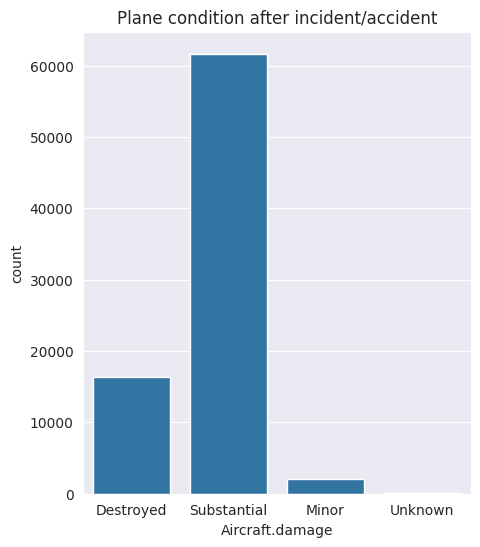

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(data=AviationDataUS, x='Aircraft.damage')

plt.title('Plane condition after incident/accident')

# Investigation Type
This analysis was done to determine the ratio between incedences and accidents investigations. The analysis shows that most investigations done were for accidents

Text(0.5, 1.0, 'Plot showing investigation type')

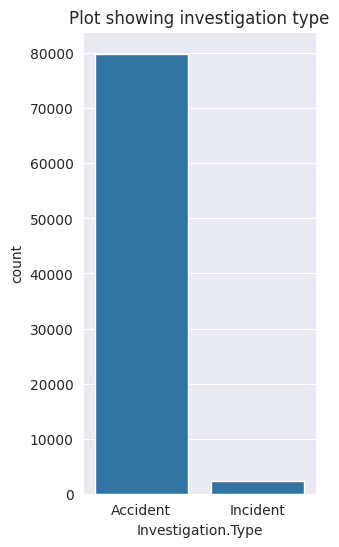

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(data=AviationDataUS, x='Investigation.Type')

plt.title('Plot showing investigation type')



In [ ]:
print(AviationDataUS['State_Abbreviation'].mode()[0])

CA


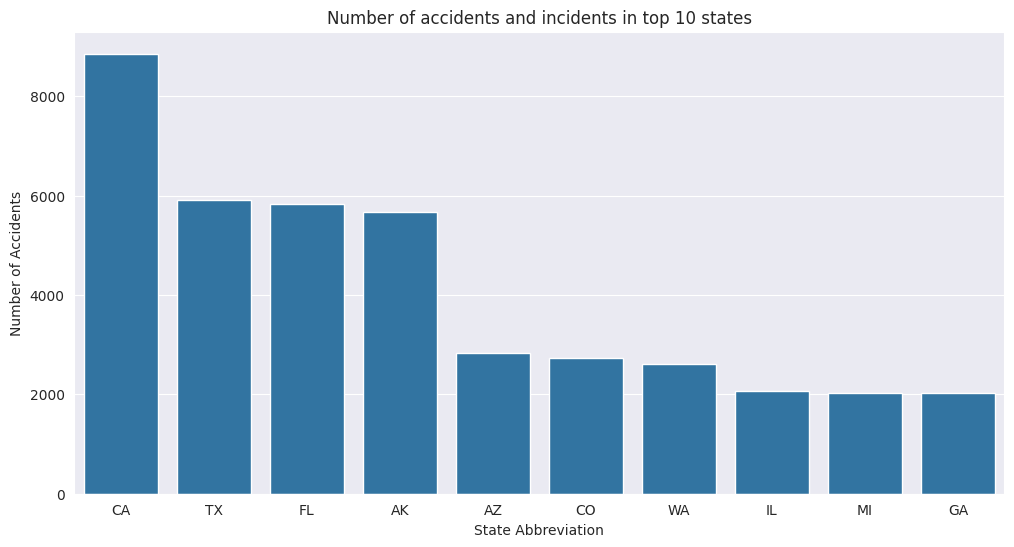

In [ ]:
top_5_states = AviationDataUS['State_Abbreviation'].value_counts().head(10).index
filtered_data = AviationDataUS[AviationDataUS['State_Abbreviation'].isin(top_5_states)]

# Plot the data
plt.figure(figsize=(12,6))
sns.countplot(
    data=filtered_data,
    x='State_Abbreviation',
    order=top_5_states
)
plt.title('Number of accidents and incidents in top 10 states')
plt.xlabel('State Abbreviation')
plt.ylabel('Number of Accidents')
plt.show()

# Engine Type
The Reciprocating type of engine has the highest number of investigated accidents. This means that most of the crafts had reciprocating engines.

Text(0.5, 1.0, 'Count plot of engine type')

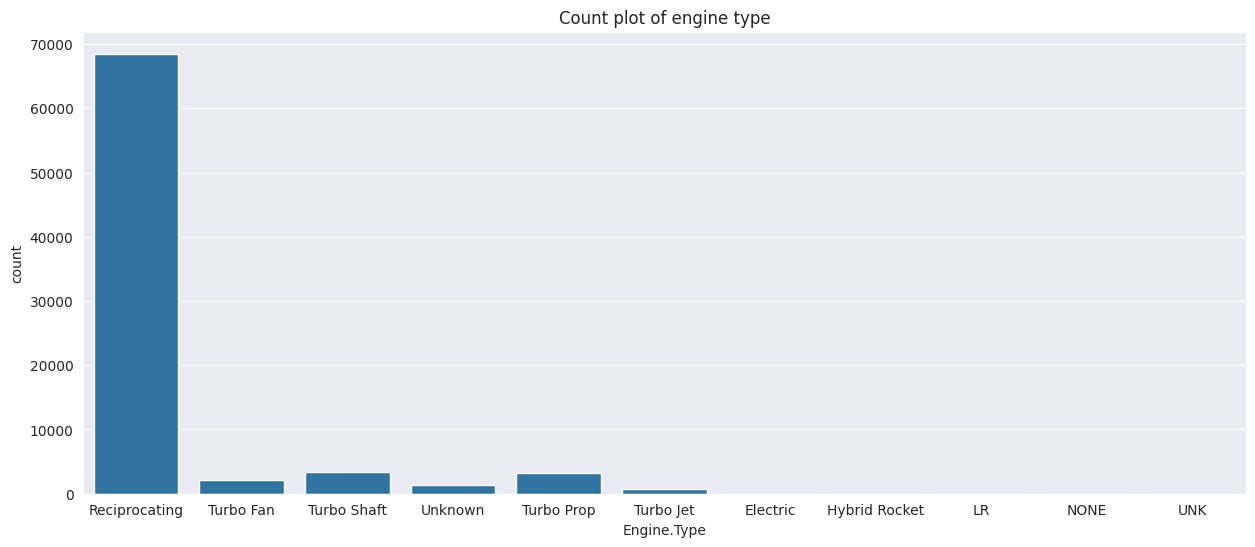

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=AviationDataUS, x='Engine.Type')

plt.title('Count plot of engine type')

# Weather Condition
Weather conditions are very important in aviation. The analysis seeks to find out if the accidents happened under specific weather conditions


Text(0.5, 1.0, 'Count plot of weather condition')

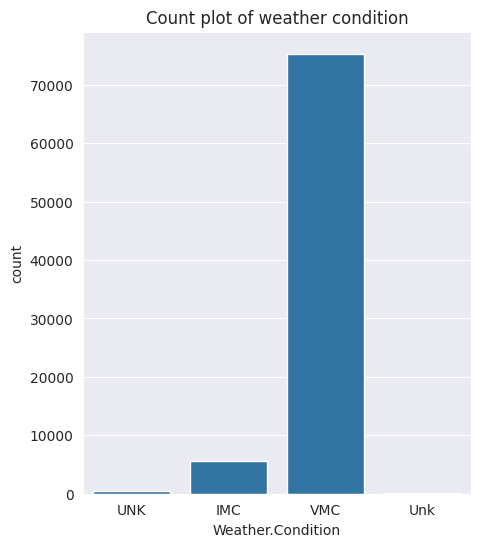

In [ ]:
plt.figure(figsize=(5,6))
sns.countplot(data=AviationDataUS, x='Weather.Condition')

plt.title('Count plot of weather condition')

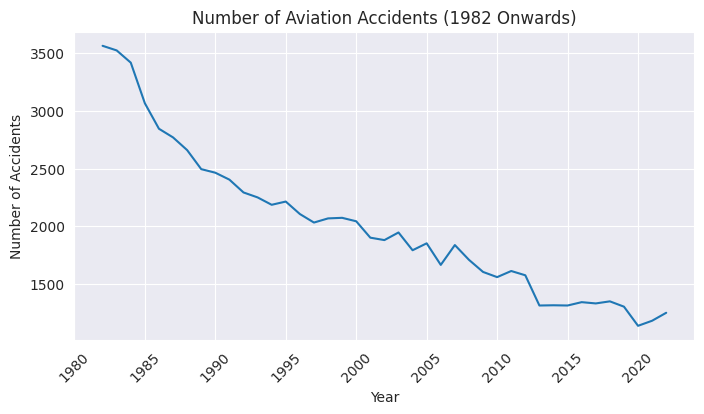

In [ ]:
AviationDataUS_filtered = AviationDataUS[AviationDataUS['Year'] >= 1982]


accidents_by_year = AviationDataUS_filtered['Year'].value_counts().sort_index()


plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-')
plt.title('Number of Aviation Accidents (1982 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Conclusion
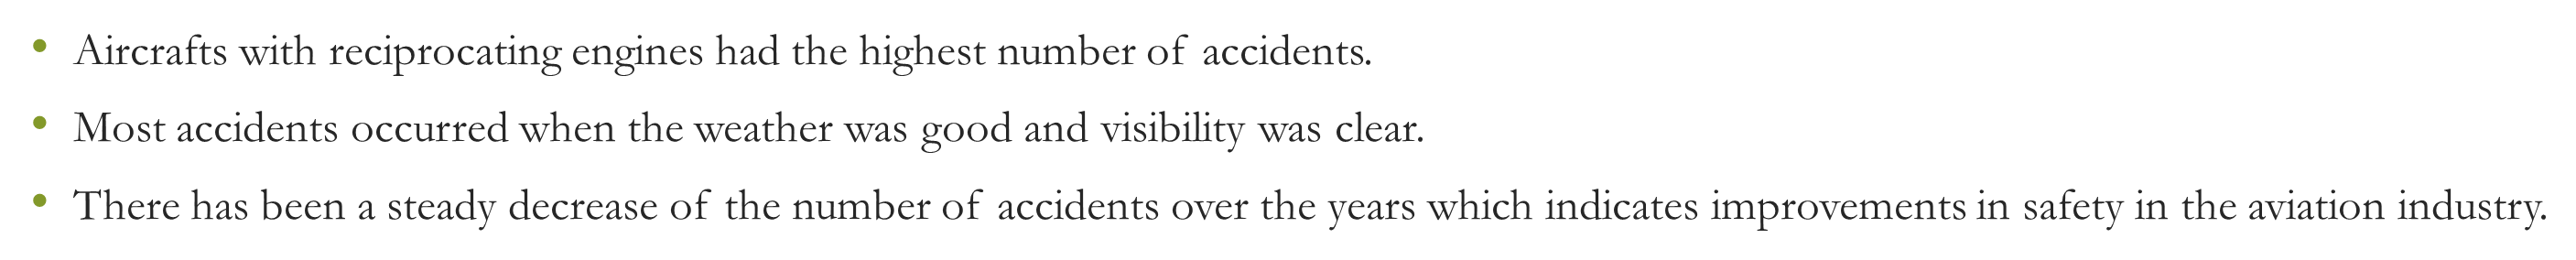

## Next Steps


1. **Investigate Accidents with Reciprocating Engines**:
   - Conduct in-depth studies to understand why reciprocating engine aircraft have the highest accident rates.
   - Explore potential technical or operational upgrades for such aircraft.

2. **Analyze Accidents in Good Weather**:
   - Examine factors contributing to accidents during good weather conditions, such as human error, operational practices, or equipment failures.
   - Implement focused training programs for pilots to reduce errors under seemingly safe conditions.

3. **Enhance Safety Standards**:
   - Build on the improvements already made by identifying key interventions that led to the decrease in accident rates.
   - Continue refining aviation safety protocols and monitoring systems to sustain and enhance this trend.

4. **Data Collection and Monitoring**:
   - Expand data collection to identify more granular trends and causal factors.
   - Utilize advanced analytics or machine learning for predictive safety measures.